In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import seaborn as sns

df = pd.read_csv("world-happiness-report-2021.csv")


In [9]:
df = df.drop(columns=["upperwhisker","lowerwhisker",
                       
                        ])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country name                    149 non-null    object 
 1   Regional indicator              149 non-null    object 
 2   Ladder score                    149 non-null    float64
 3   Standard error of ladder score  149 non-null    float64
 4   Logged GDP per capita           149 non-null    float64
 5   Social support                  149 non-null    float64
 6   Healthy life expectancy         149 non-null    float64
 7   Freedom to make life choices    149 non-null    float64
 8   Generosity                      149 non-null    float64
 9   Perceptions of corruption       149 non-null    float64
 10  Ladder score in Dystopia        149 non-null    float64
dtypes: float64(9), object(2)
memory usage: 12.9+ KB


In [15]:

df_western_Europe = df.groupby(['Regional indicator']).get_group("Western Europe")
df_western_Europe_score = df_western_Europe["Ladder score"].mean()

df_North_America= df.groupby(['Regional indicator']).get_group("North America and ANZ")
df_North_America_score = df_North_America["Ladder score"].mean()


df_Middle_East_North_Africa = df.groupby(['Regional indicator']).get_group("Middle East and North Africa")
df_Middle_East_North_Africa_score = df_Middle_East_North_Africa["Ladder score"].mean()


df_East_Asia = df.groupby(['Regional indicator']).get_group("East Asia")
df_East_Asia_score = df_East_Asia["Ladder score"].mean()


df_Southeast_Asia = df.groupby(['Regional indicator']).get_group("Southeast Asia")
df_Southeast_Asia_score = df_Southeast_Asia["Ladder score"].mean()


df_Independent_States = df.groupby(['Regional indicator']).get_group("Commonwealth of Independent States")
df_Independent_States_score = df_Independent_States["Ladder score"].mean()


df_Saharan_Africa = df.groupby(['Regional indicator']).get_group("Sub-Saharan Africa")
df_Saharan_Africa_score = df_Saharan_Africa["Ladder score"].mean()


df_South_Asia = df.groupby(['Regional indicator']).get_group("South Asia")
df_South_Asia_score = df_South_Asia["Ladder score"].mean()


df_Latin_Caribbean = df.groupby(['Regional indicator']).get_group("Latin America and Caribbean")
df_Latin_Caribbean_score = df_Latin_Caribbean["Ladder score"].mean()


df_Cetnra_Eastern_Europe = df.groupby(['Regional indicator']).get_group("Central and Eastern Europe")
df_Cetnra_Eastern_Europe_score = df_Cetnra_Eastern_Europe["Ladder score"].mean()


df["Regional indicator"].unique()

array(['Western Europe', 'North America and ANZ',
       'Middle East and North Africa', 'Latin America and Caribbean',
       'Central and Eastern Europe', 'East Asia', 'Southeast Asia',
       'Commonwealth of Independent States', 'Sub-Saharan Africa',
       'South Asia'], dtype=object)

In [16]:
df_score_by_region = {"Western Europe": [df_western_Europe_score],
                      "North America and ANZ":[df_North_America_score],
                      "Middle East and North Africa":[df_Middle_East_North_Africa_score],
                      "Latin America and Caribbean":[df_Latin_Caribbean_score],
                     "Central and Easter Europe":[df_Cetnra_Eastern_Europe_score],
                      "East Asia":[df_East_Asia_score], 
                      "Southeast Asia":[df_South_Asia_score],
                     "Commonwealth of Independent States":[df_Independent_States_score],
                      "Sub-Saharan Africa":[df_Saharan_Africa_score],
                      "South Asia":[df_South_Asia_score]}

df_score = pd.DataFrame(df_score_by_region)
df_score

Western Europe  North America and ANZ  Middle East and North Africa  \
0        6.914905                 7.1285                      5.219765   

   Latin America and Caribbean  Central and Easter Europe  East Asia  \
0                      5.90805                   5.984765   5.810333   

   Southeast Asia  Commonwealth of Independent States  Sub-Saharan Africa  \
0        4.441857                               5.467            4.494472   

   South Asia  
0    4.441857

In [17]:
df_score_t = df_score.T
df_score_t
df_score_t.rename(columns ={"0":"Region"}, inplace =True)
df_score_t.columns

Int64Index([0], dtype='int64')

In [18]:
df_score_t.dtypes

0    float64
dtype: object

In [19]:
df_score = {"Laddar Score":[df_western_Europe_score,
                            df_North_America_score,
                            df_Middle_East_North_Africa_score,
                            df_Latin_Caribbean_score,
                            df_Cetnra_Eastern_Europe_score,
                            df_East_Asia_score,
                            df_South_Asia_score,
                            df_Independent_States_score,
                            df_Saharan_Africa_score,
                            df_South_Asia_score
                           ],
           "Region":['Western Europe', 'North America and ANZ',
       'Middle East and North Africa', 'Latin America and Caribbean',
       'Central and Eastern Europe', 'East Asia', 'Southeast Asia',
       'Commonwealth of Independent States', 'Sub-Saharan Africa',
       'South Asia']}

df_s = pd.DataFrame(df_score)
df_s.set_index("Region")

Laddar Score
Region                                          
Western Europe                          6.914905
North America and ANZ                   7.128500
Middle East and North Africa            5.219765
Latin America and Caribbean             5.908050
Central and Eastern Europe              5.984765
East Asia                               5.810333
Southeast Asia                          4.441857
Commonwealth of Independent States      5.467000
Sub-Saharan Africa                      4.494472
South Asia                              4.441857

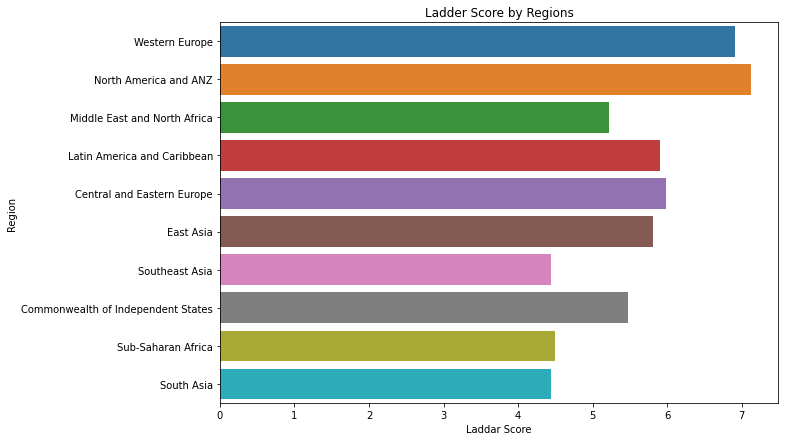

In [20]:
plt.figure(figsize=(10,7))
ax1 = sns.barplot (x="Laddar Score", y ="Region" , data = df_s,
                   orient = 'h', label = "Region").set(title ="Ladder Score by Regions")

In [21]:
ladder_score = df["Ladder score"].values
GDP = df["Logged GDP per capita"].values
support = df["Social support"].values
life_expectancy = df["Healthy life expectancy"].values
freedom = df["Freedom to make life choices"].values
generosity =df["Generosity"].values
corruption = df["Perceptions of corruption"].values

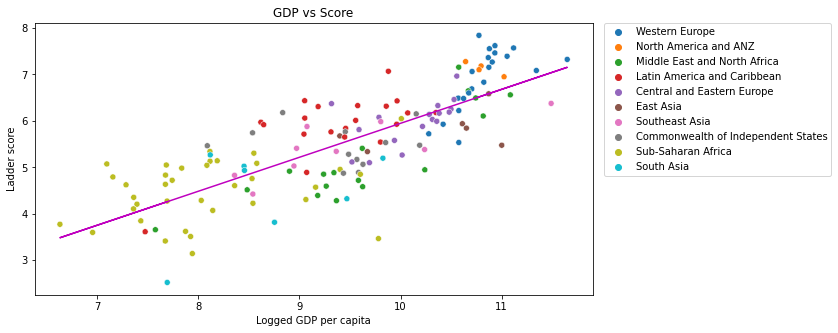

In [22]:
plt.figure(figsize=(10,5))
GDP_scatter = sns.scatterplot (data = df, x = "Logged GDP per capita", y="Ladder score",
                                  hue = "Regional indicator").set(title ='GDP vs Score')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
Gdp_corrcef = np.corrcoef(GDP,ladder_score)[0,1]
z = np.polyfit(GDP,ladder_score,1)
p = np.poly1d(z)
plt.plot(GDP,p(GDP),"m-")

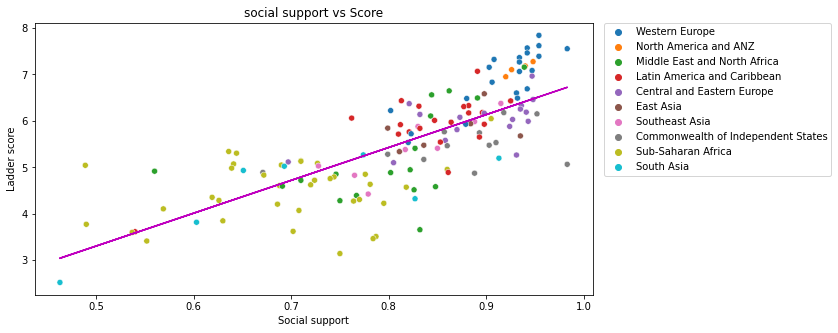

In [23]:
plt.figure(figsize=(10,5))
social_scatter = sns.scatterplot (data = df, x = "Social support", y="Ladder score",
                                  hue = "Regional indicator").set(title ='social support vs Score')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
support_corrcef = np.corrcoef(support,ladder_score)[0,1]

z_s = np.polyfit(support,ladder_score,1)
p_s = np.poly1d(z_s)

plt.plot(support,p_s(support),"m-")


NameError: name 'freedom_corr' is not defined

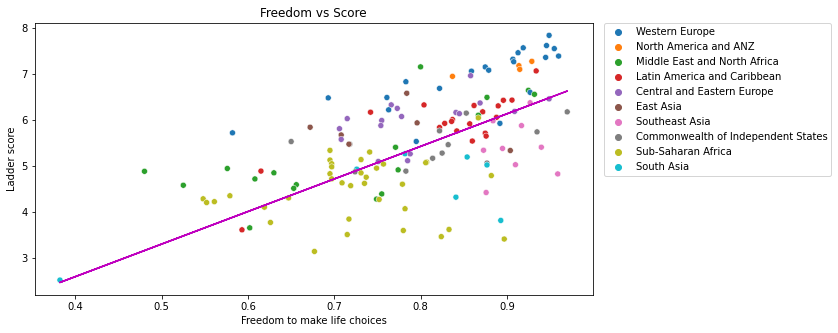

In [24]:
plt.figure(figsize=(10,5))
freedom_scatter = sns.scatterplot (data = df, x = "Freedom to make life choices", y="Ladder score",
                                  hue = "Regional indicator").set(title ='Freedom vs Score')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
freedom_corrcef = np.corrcoef(freedom,ladder_score)[0,1]

z_f = np.polyfit(freedom,ladder_score,1)
p_f = np.poly1d(z_f)

plt.plot(freedom,p_s(freedom),"m-")
freedom_corr

0.7680994550105206

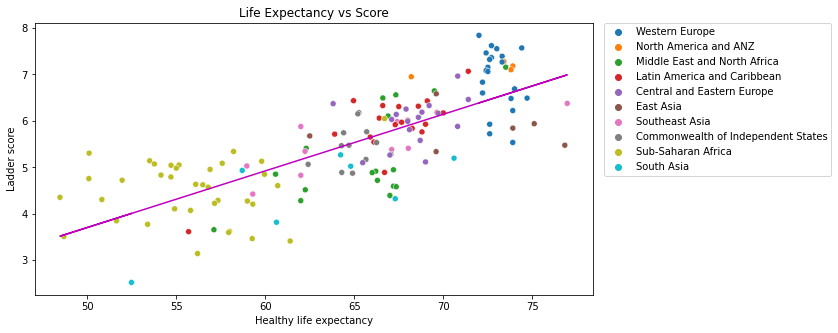

In [25]:
plt.figure(figsize=(10,5))
health_scatter = sns.scatterplot (data = df, x = "Healthy life expectancy", y="Ladder score",
                                  hue = "Regional indicator").set(title ='Life Expectancy vs Score')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
freedom_corrcef = np.corrcoef(freedom,ladder_score)[0,1]
life_corrcef = np.corrcoef(life_expectancy,ladder_score)[0,1]
life_corrcef

z_life = np.polyfit(life_expectancy,ladder_score,1)
p_life = np.poly1d(z_life)

plt.plot(life_expectancy,p_life(life_expectancy),"m-")
life_corrcef

-0.017799276922640765

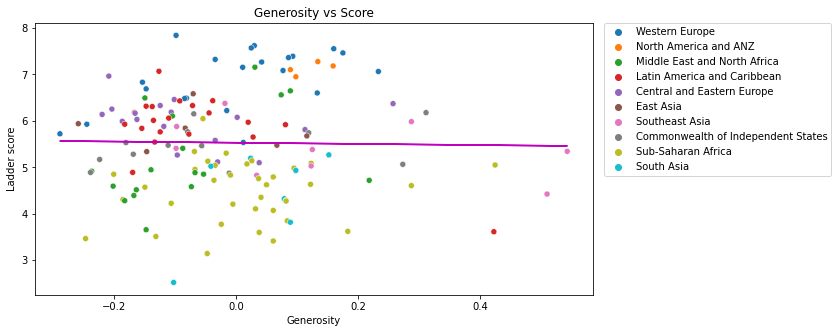

In [26]:
plt.figure(figsize=(10,5))
generosity_scatter = sns.scatterplot (data = df, x = "Generosity", y="Ladder score",
                                  hue = "Regional indicator").set(title ='Generosity vs Score')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
generosity_corrcef = np.corrcoef(generosity,ladder_score)[0,1]

z_g = np.polyfit(generosity,ladder_score,1)
p_g = np.poly1d(z_g)

plt.plot(generosity,p_g(generosity),"m-")
generosity_corrcef

-0.4211399967385785

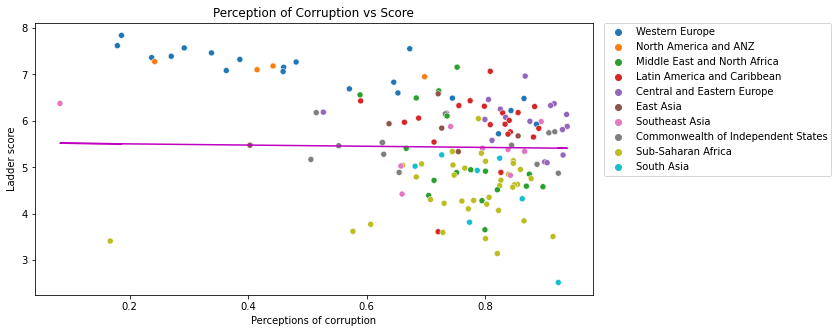

In [27]:
plt.figure(figsize=(10,5))
generosity_scatter = sns.scatterplot (data = df, x = "Perceptions of corruption", y="Ladder score",
                                  hue = "Regional indicator").set(title ='Perception of Corruption vs Score')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
corruption_corrcef = np.corrcoef(corruption,ladder_score)[0,1]

z_c = np.polyfit(corruption,ladder_score,1)
p_c = np.poly1d(z_c)

plt.plot(corruption,p_g(corruption),"m-")
corruption_corrcef